# 이미지 전처리
- 1. 원하는 방향의 신발 찾기
- 2. 불필요한 로고 지우기
- 3. 배경 색 통일하기
- 4. 구도와 크기 조정하기

## 1. 원하는 방향의 신발 찾기
- 1-1. 특정 배경색을 가진 사진을 분류하기
- 1-2. 불필요하게 큰 사진들은 제거하기
- 1-3. 원하는 방향의 신발 찾기


### 1-1. 특정 배경색을 가진 사진 분류하기
- 신발 이미지의 경우, 특정 색을 가진 사진들이 존재한다.(흰, 회, 살구 등)
- 크게 흰색, 회색, 옅은 회색을 인지시켜 분류해보고, 추가로 분류해보자
- 그리고 이미지의 경우, 이미지 가장 왼쪽 줄은 배경이 대부분 차지한다고 가정하고, 가장 많은 색을 배경색으로 정해겠다.

In [66]:
import glob
import os
import cv2
import matplotlib.pyplot as plt

file_list = glob.glob('mini_test/*')

In [67]:
file_list

['mini_test\\01f786bbd209_1.jpg',
 'mini_test\\1f50f0355c6b_1.jpg',
 'mini_test\\21ac69fb72b9_8.jpg',
 'mini_test\\2cf5d0cbbb1c_1.jpg',
 'mini_test\\2d7ce2495104_2.jpg',
 'mini_test\\314da1bd6c0f_0.jpg',
 'mini_test\\5a4690b96b0d_0.jpg',
 'mini_test\\5d6979a1be52_3.jpg',
 'mini_test\\88ffad19912c_0.jpg',
 'mini_test\\8abc8df6cf20_1.jpg',
 'mini_test\\c191e2dfc5ae_0.jpg',
 'mini_test\\db78de9f1ca5_3.jpg']

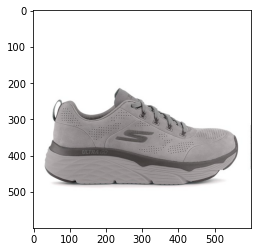

In [68]:
img_1 = cv2.imread(file_list[0])
plt.imshow(img_1)

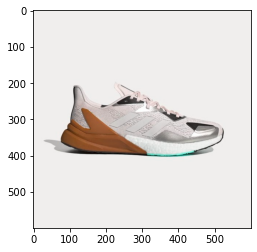

In [69]:
img_2 = cv2.imread(file_list[1])
plt.imshow(img_2)

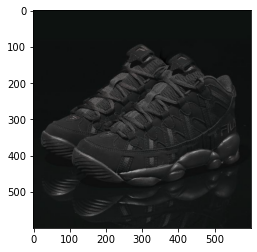

In [70]:
img_3 = cv2.imread(file_list[5])
plt.imshow(img_3)

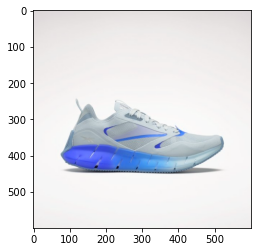

In [71]:
img_4 = cv2.imread(file_list[11])
plt.imshow(img_4)

In [136]:
# 가장 좌측의 이미지 값 찾는 함수
def find_color(image):
    img_color_list = []
    for i in range(image.shape[0]):
        img_color_list.append(image[i][0][0]) # y열 0, x열 j일 때 R / G / B값
        img_color_list.append(image[i][0][1])
        img_color_list.append(image[i][0][2])
    return sorted(img_color_list)

# list의 가장 많은 값을 찾는 함수
def find_max_color(num_list) :
    num_dic = {}
    count = 0
    num_list = sorted(num_list)
    num = num_list[0]
    for cnt, i in enumerate(num_list) :
        if len(num_list)-1 != cnt :
            if i == num : 
                count +=1
            else :
                num_dic[num] = count
                num = i
                count = 1
        else :
            count += 1
            num_dic[num] = count
    num_dic_c = {v:k for k,v in num_dic.items()} # key와 values 바꾸기
    num = int(num_dic_c[max(num_dic_c.keys())]) #가장 큰 key (이전의 count값)을 갖는 values()값 (이미지 값)
    return num
    

In [137]:
img_1_list = find_color(img_1)

In [138]:
find_max_color(img_1_list)

255

In [147]:
set(img_1_list)

{255}

In [139]:
img_2_list = find_color(img_2)

In [140]:
find_max_color(img_2_list)

240

In [146]:
set(img_2_list)

{237, 238, 240}

In [141]:
img_3_list = find_color(img_3)

In [142]:
find_max_color(img_3_list)

16

In [148]:
set(img_3_list)

{13, 14, 15, 16, 17, 18, 19, 20, 21}

In [143]:
img_4_list = find_color(img_4)

In [144]:
(find_max_color(img_4_list))

255

In [145]:
set(img_4_list)

{252, 253, 254, 255}

#### 분류해보기

In [82]:
img_list = glob.glob('test/*')

In [83]:
img_list

['test\\008dbd584844_0.jpg',
 'test\\008dbd584844_1.jpg',
 'test\\008dbd584844_2.jpg',
 'test\\008dbd584844_3.jpg',
 'test\\008dbd584844_4.jpg',
 'test\\008dbd584844_5.jpg',
 'test\\008dbd584844_6.jpg',
 'test\\008dbd584844_7.jpg',
 'test\\008dbd584844_8.jpg',
 'test\\008dbd584844_9.jpg',
 'test\\017d717f4766_0.jpg',
 'test\\017d717f4766_1.jpg',
 'test\\017d717f4766_2.jpg',
 'test\\017d717f4766_3.jpg',
 'test\\017d717f4766_4.jpg',
 'test\\017d717f4766_5.jpg',
 'test\\01f786bbd209_0.jpg',
 'test\\01f786bbd209_1.jpg',
 'test\\01f786bbd209_2.jpg',
 'test\\01f786bbd209_3.jpg',
 'test\\01f786bbd209_4.jpg',
 'test\\01f786bbd209_5.jpg',
 'test\\039c4c1dc297_0.jpg',
 'test\\039c4c1dc297_1.jpg',
 'test\\039c4c1dc297_2.jpg',
 'test\\07b8409a7ba4_0.jpg',
 'test\\07b8409a7ba4_1.jpg',
 'test\\07b8409a7ba4_2.jpg',
 'test\\07b8409a7ba4_3.jpg',
 'test\\07b8409a7ba4_4.jpg',
 'test\\080a9bee8f16_0.jpg',
 'test\\080a9bee8f16_1.jpg',
 'test\\080a9bee8f16_2.jpg',
 'test\\080a9bee8f16_3.jpg',
 'test\\080a9b

In [100]:
import shutil
from tqdm.notebook import tqdm
import cv2

for img_path in tqdm(img_list):
    img = cv2.imread(img_path)
    file_name = img_path.split("\\")[1]
    img_color_list = find_color(img)
    max_color = find_max_color(img_color_list)
    if max_color < 50 : 
        shutil.copy(img_path, f"16/{file_name}")
    elif  200 <= max_color <= 237 :
        shutil.copy(img_path, f"237/{file_name}")
    elif 237 <= max_color <= 255 :
        shutil.copy(img_path, f"255/{file_name}")
    else :
        shutil.copy(img_path, f"else/{file_name}")

  0%|          | 0/1072 [00:00<?, ?it/s]

- max_color <= 50
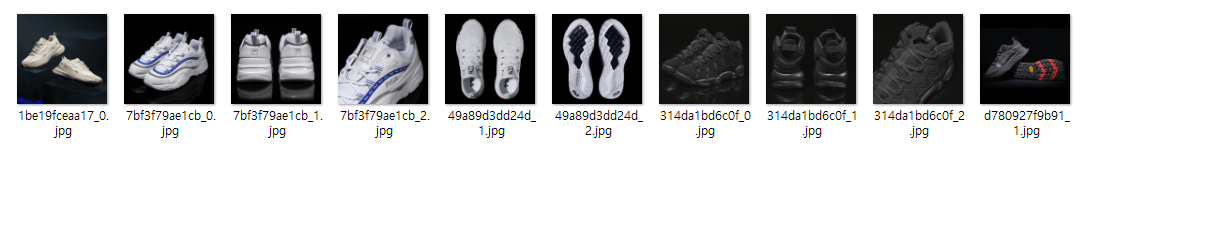

- 200 <= max_color <= 237
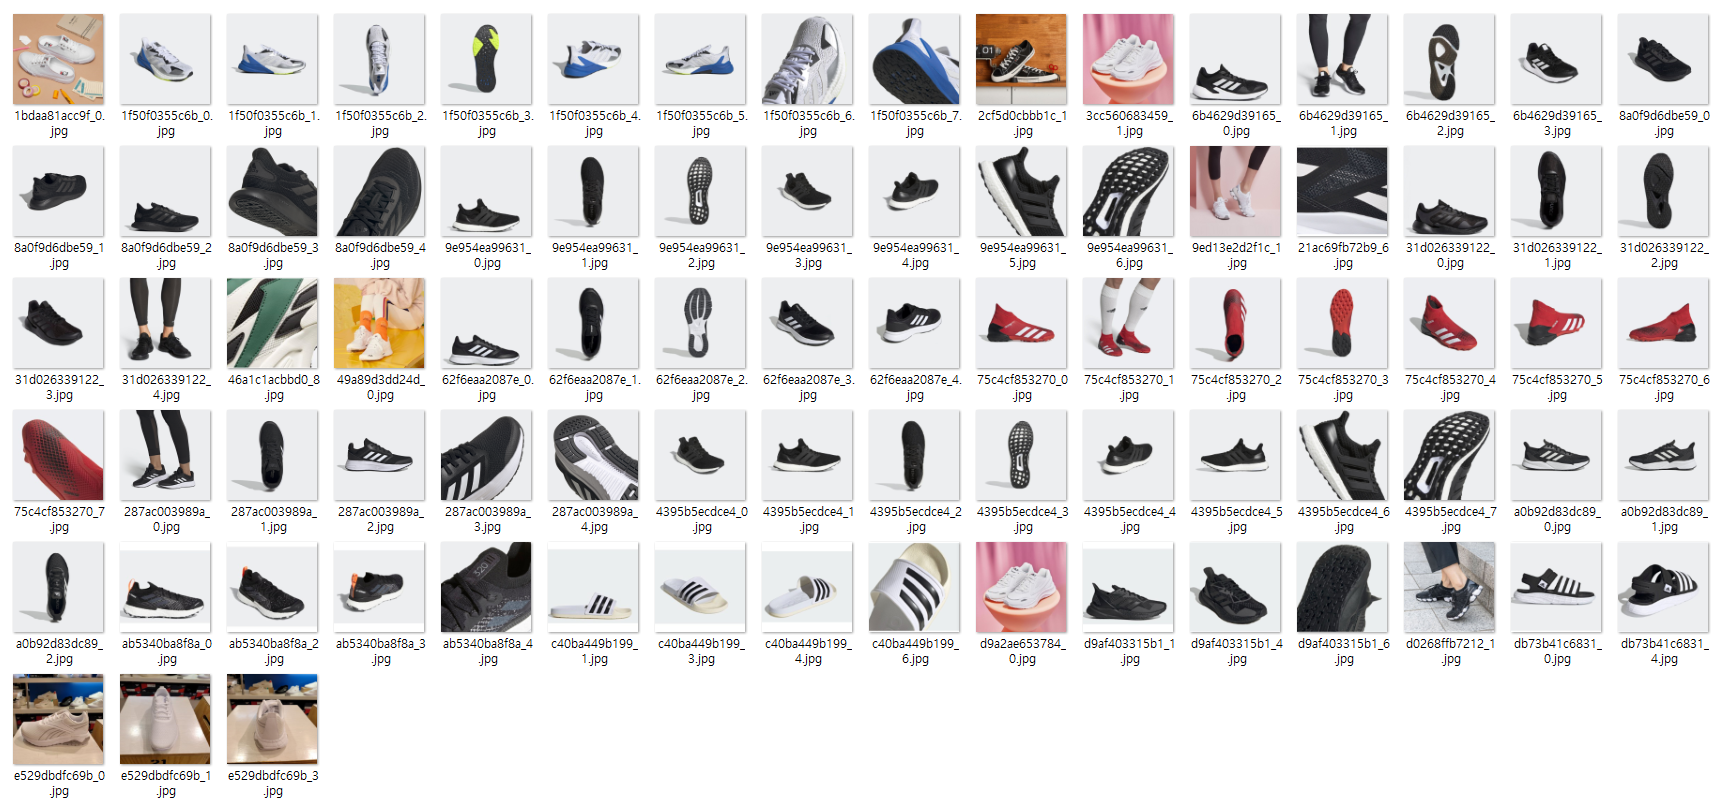
- 237 <= max_color <= 255
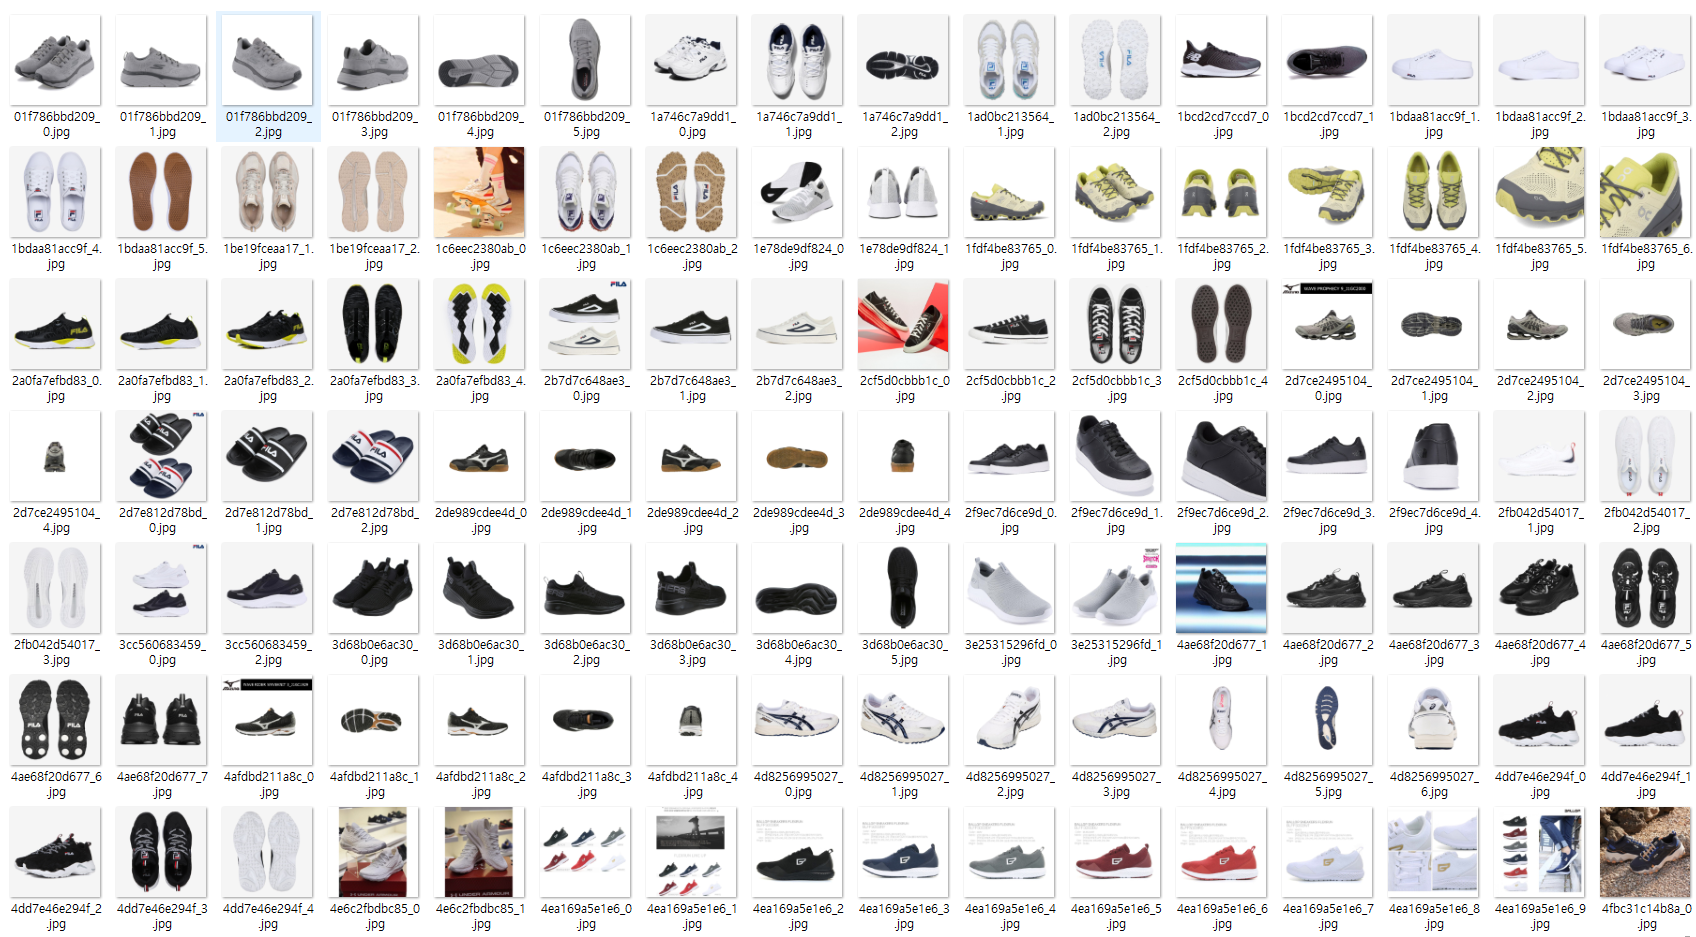
- else 
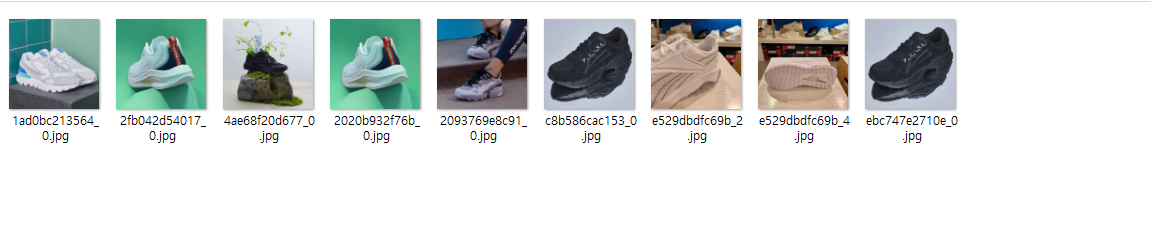

#### 분류 결과
- 오류로 생각되는 약간의 데이터가 있지만 대체로 잘 분류가 되었다.

### 1-2. 불필요하게 큰 사진들은 제거하기
- img_1, img_2, img_3, img_4에서 신발 이미지가 전체 이미지에서 차지하는 비중은 얼마인지 확인해보자.
- 그리고 신발 이미지가 유사한 퍼센트 만큼만 차지하는 사진 외 나머지 자료들은 불필요한 자료로 판단하고 분류해보자

1080000

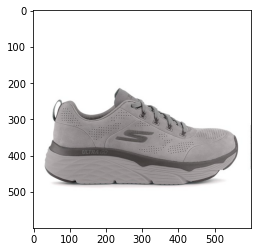

In [161]:
plt.imshow(img_1)

In [162]:
img_1_list = find_color(img_1)

In [163]:
find_max_color(img_1_list)

255

In [177]:
set(img_1_list)

{255}

In [283]:
# img_1의 경우 값 값은 1개
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) == color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

In [284]:
img_1_percent = background_percent(img_1, 255)
img_1_percent

70.11444444444444

In [285]:
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            for z in range(3):
                 if image[i][j][z] == color:
                        count += 1
    return (count / np.size(image)) *100

In [286]:
img_1_percent = background_percent(img_1, 255)
img_1_percent

70.43916666666667

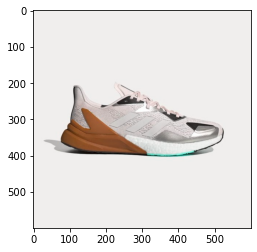

In [274]:
plt.imshow(img_2)

In [166]:
img_2_list = find_color(img_2)

In [167]:
find_max_color(img_2_list)

240

In [178]:
set(img_2_list)

{237, 238, 240}

In [186]:
# img_2의 경우 값 값은 3개
def background_percent(image, color_1,color_2 ):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            for z in range(3):
                 if color_1<= image[i][j][z] <= color_2:
                        count += 1
    return (count / np.size(image)) *100

In [185]:
img_2_percent = background_percent(img_2, 237, 240)
img_2_percent

82.62518518518519

In [287]:
# img_2의 경우 값 값은 3개
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) >= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

In [288]:
img_2_percent = background_percent(img_2, 237)
img_2_percent

83.77833333333334

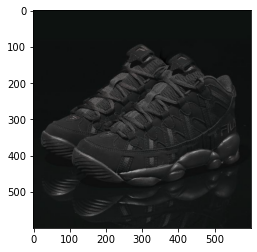

In [169]:
plt.imshow(img_3)

In [170]:
img_3_list = find_color(img_3)

In [171]:
find_max_color(img_3_list)

16

In [179]:
set(img_3_list)

{13, 14, 15, 16, 17, 18, 19, 20, 21}

#### 평균값을 13, 21 사이로 했을 때

In [230]:
# img_3의 경우 값 값은 9개. 평균을
def background_percent(image, color_1,color_2 ):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            for z in range(3):
                 if color_1<= image[i][j][z] <= color_2:
                        count += 1
    return (count / np.size(image)) *100

In [231]:
img_3_percent = background_percent(img_3, 13, 21)
img_3_percent

54.20166666666667

In [289]:
# img_3의 경우 값 값은 3개
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) <= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

In [290]:
img_3_percent = background_percent(img_3, 21)
img_3_percent

53.715

#### 평균값을 30 이하로 했을 때

In [318]:
# img_3의 경우 값 값은 3개
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) <= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

In [319]:
img_3_percent = background_percent(img_3, 30)
img_3_percent

69.31583333333333

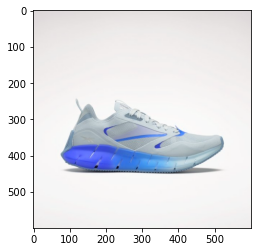

In [173]:
plt.imshow(img_4)

In [194]:
img_4_list = find_color(img_4)

In [195]:
find_max_color(img_4_list)

255

In [196]:
set(img_4_list)

{252, 253, 254, 255}

In [199]:
# img_4의 경우 값 값은 4개
def background_percent(image, color ):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            for z in range(3):
                 if color_1<= image[i][j][z] <= color_2:
                        count += 1
    return count

In [205]:
img_4_percent = background_percent(img_4, 252, 255)
img_4_percent

7740

In [304]:
# img_4의 경우 값 값은 3개
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) >= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

In [306]:
img_4_percent = background_percent(img_4, 235)
img_4_percent

70.34138888888889

#### 이미지 4의 경우 %가 매우 적게 나온다. 
- 이미지 4에서 중복되지 않는 이미지 값 전부를 확인해보자

In [218]:
def find_color(image):
    img_color_list = []
    for j in range(image.shape[1]):
        for i in range(image.shape[0]):
            img_color_list.append(image[i][j][0]) # y열 0, x열 j일 때 R / G / B값
            img_color_list.append(image[i][j][1])
            img_color_list.append(image[i][j][2])
    return (sorted(img_color_list))

In [219]:
color_img_4 = find_color(img_4)

In [220]:
color_img_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 

In [221]:
len(color_img_4) 

1080000

In [224]:
len(set(color_img_4))#모든 색이 다 나왔다;;

256

In [302]:
img_4[0][0]

array([255, 254, 255], dtype=uint8)

In [216]:
# 색깔 당 나온 횟수를 확인해보자
def find_color_count(num_list) :
    num_dic = {}
    count = 0
    num_list = sorted(num_list)
    num = num_list[0]
    for cnt, i in enumerate(num_list) :
        if len(num_list)-1 != cnt :
            if i == num : 
                count +=1
            else :
                num_dic[num] = count
                num = i
                count = 1
        else :
            count += 1
            num_dic[num] = count

    return num_dic
    

In [225]:
color_count = find_color_count(color_img_4)
color_count

{0: 43,
 1: 6,
 2: 3,
 3: 3,
 4: 11,
 5: 12,
 6: 6,
 7: 5,
 8: 7,
 9: 15,
 10: 9,
 11: 10,
 12: 7,
 13: 12,
 14: 9,
 15: 9,
 16: 22,
 17: 9,
 18: 21,
 19: 17,
 20: 17,
 21: 21,
 22: 21,
 23: 25,
 24: 19,
 25: 29,
 26: 30,
 27: 16,
 28: 26,
 29: 27,
 30: 23,
 31: 37,
 32: 27,
 33: 25,
 34: 29,
 35: 35,
 36: 37,
 37: 32,
 38: 37,
 39: 40,
 40: 42,
 41: 33,
 42: 45,
 43: 42,
 44: 60,
 45: 46,
 46: 66,
 47: 83,
 48: 108,
 49: 108,
 50: 149,
 51: 214,
 52: 340,
 53: 415,
 54: 498,
 55: 595,
 56: 672,
 57: 563,
 58: 478,
 59: 410,
 60: 399,
 61: 442,
 62: 361,
 63: 381,
 64: 409,
 65: 421,
 66: 450,
 67: 441,
 68: 439,
 69: 436,
 70: 547,
 71: 486,
 72: 512,
 73: 476,
 74: 470,
 75: 465,
 76: 458,
 77: 487,
 78: 523,
 79: 510,
 80: 478,
 81: 519,
 82: 494,
 83: 463,
 84: 477,
 85: 437,
 86: 476,
 87: 461,
 88: 481,
 89: 437,
 90: 454,
 91: 427,
 92: 435,
 93: 482,
 94: 526,
 95: 521,
 96: 484,
 97: 487,
 98: 536,
 99: 545,
 100: 536,
 101: 594,
 102: 500,
 103: 478,
 104: 509,
 105: 488,
 10

In [242]:
color_count_c = sorted(color_count.values(),reverse=True)

In [248]:
sum_num = 0
for i in range(10) :
    sum_num += color_count_c[i]
sum_num

603608

In [265]:
#많은 값을 가지고 있는 key값을 찾아보자
num_dic_c = {v:k for k,v in color_count.items()}
num_dic_cc = sorted(num_dic_c.items(), reverse = True)

In [266]:
num_dic_cc

[(153913, 246),
 (66917, 244),
 (64331, 247),
 (60102, 248),
 (59497, 241),
 (54201, 249),
 (45923, 243),
 (37530, 245),
 (31742, 240),
 (29452, 237),
 (27557, 242),
 (27254, 235),
 (26269, 236),
 (26154, 238),
 (23902, 239),
 (20023, 250),
 (16298, 234),
 (13717, 229),
 (12310, 230),
 (12211, 231),
 (12058, 228),
 (12037, 233),
 (10974, 232),
 (9364, 224),
 (8803, 225),
 (8159, 223),
 (8035, 226),
 (7130, 227),
 (5360, 222),
 (4926, 251),
 (4783, 221),
 (4522, 219),
 (4433, 220),
 (3701, 218),
 (2863, 255),
 (2640, 252),
 (2458, 217),
 (2116, 216),
 (2066, 178),
 (1955, 177),
 (1944, 184),
 (1934, 215),
 (1916, 180),
 (1906, 183),
 (1892, 176),
 (1883, 181),
 (1869, 179),
 (1824, 186),
 (1819, 214),
 (1762, 182),
 (1759, 185),
 (1735, 187),
 (1733, 175),
 (1729, 188),
 (1715, 192),
 (1710, 212),
 (1699, 190),
 (1680, 213),
 (1678, 174),
 (1676, 210),
 (1663, 193),
 (1652, 195),
 (1649, 172),
 (1627, 173),
 (1608, 211),
 (1597, 194),
 (1584, 189),
 (1575, 171),
 (1573, 169),
 (1568, 19

In [267]:
for i in range(10):
    print(num_dic_cc[i])

(153913, 246)
(66917, 244)
(64331, 247)
(60102, 248)
(59497, 241)
(54201, 249)
(45923, 243)
(37530, 245)
(31742, 240)
(29452, 237)


### 230 이상의 값으로 percent를 구해보자

In [307]:
def background_percent(image, color_1,color_2 ):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            for z in range(3):
                 if color_1<= image[i][j][z] <= color_2:
                        count += 1
    return (count / np.size(image)) *100

In [308]:
img_4_percent = background_percent(img_4, 230, 255)
img_4_percent

76.96879629629629

In [309]:
# img_4
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) >= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

In [310]:
img_4_percent = background_percent(img_4, 235)
img_4_percent

70.34138888888889

### 값이 배경이 70%이상 차지하는 것으로 판단되며, 이 기준으로 한번 나누어보자

In [313]:
img_list_16 = glob.glob('16/*')

In [311]:
img_list_237 = glob.glob('237/*')

In [312]:
img_list_255 = glob.glob('255/*')

In [320]:
# img_list_16  max_color <= 50
import shutil
from tqdm.notebook import tqdm
import cv2

# 이미지에서 배경이 차지하는 비율
# 모든 신발이 검은색이기 때문에 30퍼로 줄여서 실행.
def background_percent_dark(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) <= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

for img_path in tqdm(img_list_16):
    img = cv2.imread(img_path)
    file_name = img_path.split("\\")[1]
    percent = background_percent_dark(img, 30) 
    
    #어두운 그림 중 배경이 전체의 70%가 넘는 이미지만 추출해보자
    
    if percent > 70 : 
        shutil.copy(img_path, f"16/select/{file_name}")
    else :
        shutil.copy(img_path, f"16/else/{file_name}")

  0%|          | 0/10 [00:00<?, ?it/s]

In [322]:
# img_list_237 -> 200 <= max_color <= 237
import shutil
from tqdm.notebook import tqdm
import cv2

# 이미지에서 배경이 차지하는 비율. 평균 값 200이상인 것으로 추출해보자
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) >= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

for img_path in tqdm(img_list_237):
    img = cv2.imread(img_path)
    file_name = img_path.split("\\")[1]
    percent = background_percent(img, 200) 
    
    # 그림 중 배경이 전체의 70%가 넘는 이미지만 추출해보자
    
    if percent > 70 : 
        shutil.copy(img_path, f"237/select/{file_name}")
    else :
        shutil.copy(img_path, f"237/else/{file_name}")

  0%|          | 0/83 [00:00<?, ?it/s]

In [323]:
# img_list_255 -> 237 <= max_color <= 255
import shutil
from tqdm.notebook import tqdm
import cv2

# 이미지에서 배경이 차지하는 비율. 평균 값 237이상인 것으로 추출해보자
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) >= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

for img_path in tqdm(img_list_255):
    img = cv2.imread(img_path)
    file_name = img_path.split("\\")[1]
    percent = background_percent(img, 237) 
    
    # 그림 중 배경이 전체의 70%가 넘는 이미지만 추출해보자
    # -> 70%의 경우, '검은색 신발'이며 큰 이미지를 가진 경우는 else로 추출되었다.
    
    if percent > 70 : 
        shutil.copy(img_path, f"255/select/{file_name}")
    else :
        shutil.copy(img_path, f"255/else/{file_name}")

  0%|          | 0/970 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [327]:
img_list_non = glob.glob('255/select/*')

In [328]:
img_list_non

['255/select\\6c56b472cb75_0.jpg',
 '255/select\\980da802ad78_0.jpg',
 '255/select\\a8ca8a46a0e6_1.jpg',
 '255/select\\b0cc040709a3_0.jpg']

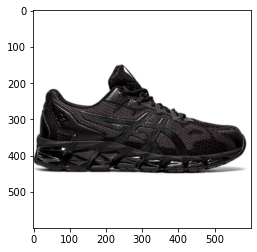

In [329]:
img_path = img_list_non[0]
img = cv2.imread(img_path)
plt.imshow(img)

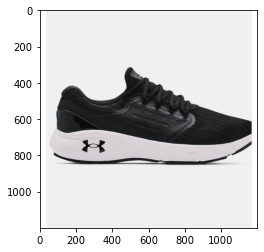

In [330]:
img_path = img_list_non[1]
img = cv2.imread(img_path)
plt.imshow(img)

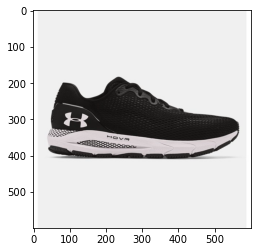

In [331]:
img_path = img_list_non[2]
img = cv2.imread(img_path)
plt.imshow(img)

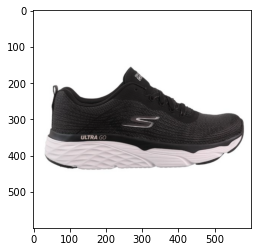

In [332]:
img_path = img_list_non[3]
img = cv2.imread(img_path)
plt.imshow(img)

In [334]:
for img_path in tqdm(img_list_non):
    img = cv2.imread(img_path)
    file_name = img_path.split("\\")[1]
    percent = background_percent(img, 237) 
    print(percent)

  0%|          | 0/4 [00:00<?, ?it/s]

69.98166666666667
72.47680555555556
76.57722222222222
71.90138888888889


In [337]:
# img_list_255 -> 237 <= max_color <= 255
import shutil
from tqdm.notebook import tqdm
import cv2

# 이미지에서 배경이 차지하는 비율. 평균 값 237이상인 것으로 추출해보자
def background_percent(image, color):
    count = 0
    for i, i_key in enumerate(image[0]):
        for j, h_key in enumerate(image[1]):
            if np.average(image[i][j]) >= color :
                        count += 1
    return count / (image.shape[0]*image.shape[1]) * 100

for img_path in tqdm(img_list_255):
    img = cv2.imread(img_path)
    file_name = img_path.split("\\")[1]
    percent = background_percent(img, 237) 
    
    # 위의 테스트 결과 69%의 이미지가 else로 분류되었음을 알 수 있다.
    # 그림 중 배경이 전체의 65%가 넘는 이미지만 추출해보자
    if percent > 65 : 
        shutil.copy(img_path, f"255/select/{file_name}")
    else :
        shutil.copy(img_path, f"255/else/{file_name}")

  0%|          | 0/970 [00:00<?, ?it/s]